In [4]:
import tensorflow as tf

/home/skipper/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/skipper/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/skipper/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/skipper/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:5

In [5]:
from tensorflow import keras

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
mnist = keras.datasets.fashion_mnist

In [8]:
type(mnist)

tensorflow.python.util.deprecation_wrapper.DeprecationWrapper

In [9]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [12]:
X_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [13]:
np.max(X_train)

255

In [14]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [15]:
class_names = ['top','trowser','pullover','dress','coat','sandle','shirt','sneaker','bag','boot']

In [16]:
X_test.shape

(10000, 28, 28)

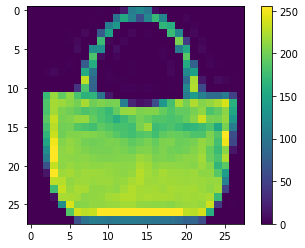

In [20]:
plt.figure()
plt.imshow(X_train[100])
plt.colorbar()

In [21]:
X_train = X_train/255
X_test = X_test/255

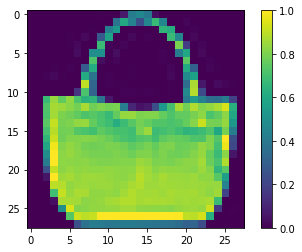

In [22]:
plt.figure()
plt.imshow(X_train[100])
plt.colorbar()

In [27]:
#build model

In [29]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense

In [31]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(256,activation = 'relu'))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [35]:
model.fit(X_train,y_train,epochs = 10)

Epoch 1/10
60000/60000 [==============================] - 9s 156us/sample - loss: 0.4838 - acc: 0.8244
Epoch 2/10
60000/60000 [==============================] - 9s 158us/sample - loss: 0.3660 - acc: 0.8652
Epoch 3/10
60000/60000 [==============================] - 10s 168us/sample - loss: 0.3301 - acc: 0.8790
Epoch 4/10
60000/60000 [==============================] - 11s 177us/sample - loss: 0.3077 - acc: 0.8868
Epoch 5/10
60000/60000 [==============================] - 10s 174us/sample - loss: 0.2905 - acc: 0.8907
Epoch 6/10
60000/60000 [==============================] - 10s 174us/sample - loss: 0.2750 - acc: 0.8974
Epoch 7/10
60000/60000 [==============================] - 11s 179us/sample - loss: 0.2592 - acc: 0.9017
Epoch 8/10
60000/60000 [==============================] - 11s 181us/sample - loss: 0.2509 - acc: 0.9049
Epoch 9/10
60000/60000 [==============================] - 11s 178us/sample - loss: 0.2399 - acc: 0.9086
Epoch 10/10
60000/60000 [==============================] - 11s 182

In [36]:
test_loss,test_acc = model.evaluate(X_test,y_test)
print(test_loss,test_acc)

10000/10000 [==============================] - 1s 79us/sample - loss: 0.3643 - acc: 0.8709
0.36429724297523497 0.8709


In [37]:
pred = model.predict_classes(X_test)

In [38]:
pred

array([9, 2, 1, ..., 8, 1, 5])